In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'NanumGothic'
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../01.Data_Collection/films.csv')
print(df.shape)

(817, 36)


In [4]:
df.isnull().sum()

순위            9
영화명           0
개봉일           9
매출액           9
매출액점유율        9
누적매출액         9
관객수           9
누적관객수         9
스크린수          9
상영횟수          9
대표국적          9
국적            9
제작사          29
배급사          10
등급            9
장르            9
감독           12
배우           40
배역명         458
영화코드          0
배우코드         37
주연배우         32
역할_배우        37
배우성별         32
작가          147
대표작가(필명)    138
작가필모        138
작가코드        138
작가_대표역할     138
대표작가        139
작가성별        173
감독코드         24
대표감독         24
감독_대표역할      24
감독필모         24
감독성별         27
dtype: int64

## 컬럼 순서 재배열

In [3]:
len(df.columns)

34

In [4]:
df.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수',
       '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우', '배역명',
       '영화코드', '배우코드', '주연배우', '역할_배우', '배우성별', '작가', '작가코드', '대표작가',
       '역할_시나리오(각본)', '작가성별', 'F-rated', '감독코드', '대표감독', '역할_감독', '감독성별'],
      dtype='object')

In [5]:
column_list = ['순위', '영화명', '영화코드', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', 
               '스크린수', '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', 'F-rated',
               '감독', '대표감독', '감독코드', '감독성별', '역할_감독',
               '작가', '대표작가', '작가코드', '작가성별', '역할_시나리오(각본)',
               '배우', '주연배우', '배우코드', '배우성별', '역할_배우', '배역명']
df = df[column_list]

In [7]:
df.sample()

,순위,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,F-rated,감독,대표감독,감독코드,감독성별,역할_감독,작가,대표작가,작가코드,작가성별,역할_시나리오(각본),배우,주연배우,배우코드,배우성별,역할_배우,배역명
586,190.0,행복의 나라,20180803.0,2018.7.19,"6,607,800",0.0%,"6,607,800","1,006","1,006",15,269,한국,한국,(주)무다필름,㈜인디스토리,청소년관람불가,"드라마,가족",0,정민규,정민규,20113287.0,남자,감독,정민규,정민규,20113287.0,남자,시나리오(각본),"지용석,예수정,김시은,기주봉,김근영,김민중,김은경,이민아,이새별",지용석,20120069.0,남자,배우,민수


## 데이터타입 변경
뒤에서 작업하다가 자꾸 꼬여서 df_in_digit 만들기 전에 타입 먼저 맞출게요.

In [8]:
df.dtypes

순위             float64
영화명             object
영화코드            object
개봉일             object
매출액             object
매출액점유율          object
누적매출액           object
관객수             object
누적관객수           object
스크린수            object
상영횟수            object
대표국적            object
국적              object
제작사             object
배급사             object
등급              object
장르              object
F-rated          int64
감독              object
대표감독            object
감독코드           float64
감독성별            object
역할_감독           object
작가              object
대표작가            object
작가코드           float64
작가성별            object
역할_시나리오(각본)     object
배우              object
주연배우            object
배우코드           float64
배우성별            object
역할_배우           object
배역명             object
dtype: object

In [12]:
# 매출액, 매출액점유율, 누적매출액, 관객수, 누적관객수, 스크린수, 상영횟수 -> float
columns = ['매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수']

# for c in columns:
#     print(c)
#     print(df[c].dtype)
#     df[c] = df[c].apply(lambda x: )
#     if c == '매출액점유율': df[c] = df[c].apply(lambda x: float(x.replace('%','')))
    
#     else:
#       df[c] = df[c].apply(lambda x: int(x.replace(',', '').replace('%','')))
    
#df.dtypes

In [13]:
# df_in_digit['개봉일'] = pd.to_datetime(df_in_digit['개봉일'])
# df_in_digit['year'] = pd.to_datetime(df_in_digit['개봉일']).dt.year
# df_in_digit['month'] = pd.to_datetime(df_in_digit['개봉일']).dt.month
# df_in_digit['day'] = pd.to_datetime(df_in_digit['개봉일']).dt.day
# df_in_digit['dayofweek'] = pd.to_datetime(df_in_digit['개봉일']).dt.dayofweek

## merge 확인 부탁드려요

In [14]:
df.isnull().sum()

순위              31
영화명              0
영화코드             0
개봉일             31
매출액             31
매출액점유율          31
누적매출액           31
관객수             31
누적관객수           31
스크린수            31
상영횟수            31
대표국적            31
국적              31
제작사             51
배급사             32
등급              31
장르              31
F-rated          0
감독              34
대표감독            51
감독코드            51
감독성별            53
역할_감독           51
작가             169
대표작가           169
작가코드           169
작가성별           203
역할_시나리오(각본)    169
배우              62
주연배우            54
배우코드            59
배우성별            54
역할_배우           59
배역명            480
dtype: int64

In [15]:
df.tail()

,순위,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,F-rated,감독,대표감독,감독코드,감독성별,역할_감독,작가,대표작가,작가코드,작가성별,역할_시나리오(각본),배우,주연배우,배우코드,배우성별,역할_배우,배역명
834,NaN,movieNm,movieCd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,김대성,20223386.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,NaN,movieNm,movieCd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,김도영,20153842.0,여자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,movieNm,movieCd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,반태경,20327772.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,NaN,movieNm,movieCd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,신상민,20318581.0,여자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,movieNm,movieCd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,조성규,10065915.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df[df['감독'].isnull()]

,순위,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,F-rated,감독,대표감독,감독코드,감독성별,역할_감독,작가,대표작가,작가코드,작가성별,역할_시나리오(각본),배우,주연배우,배우코드,배우성별,역할_배우,배역명
499,69.0,젝스키스 에이틴,20189525.0,2018.1.18,"364,405,500",0.0%,"364,405,500","50,419","50,419",25,774,한국,한국,(주)와이지엔터테인먼트,씨제이 씨지브이(CJ CGV)(주),전체관람가,다큐멘터리,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"은지원,이재진,장수원,김재덕,강성훈,이재진",은지원,10054654.0,남자,배우,NaN
658,84.0,트와이스랜드,20184529.0,2018.12.7,"153,765,000",0.0%,"153,765,000","18,252","18,252",53,572,한국,한국,(주)제이와이피엔터테인먼트,씨제이 씨지브이(CJ CGV)(주),전체관람가,다큐멘터리,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"나연,정연,모모,사나,지효,미나,다현,채영,쯔위",나연,10072145.0,여자,배우,NaN
676,35.0,러브 유어셀프 인 서울,20185124.0,2019.1.26,"3,209,682,900",0.4%,"3,209,682,900","342,366","342,366",224,"4,535",한국,한국,"빅히트 엔터테인먼트,씨제이 씨지브이(CJ CGV)(주)",씨제이 씨지브이(CJ CGV)(주),전체관람가,공연,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"김남준,김석진,민윤기,정호석,박지민,김태형,전정국",김남준,20311775.0,남자,배우,NaN
808,NaN,선종 무문관,20183144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,윤용진,윤용진,20110475.0,남자,시나리오(각본),NaN,NaN,NaN,NaN,NaN,NaN
809,NaN,선종 무문관,20183144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,김의곤,김의곤,20244869.0,남자,시나리오(각본),NaN,NaN,NaN,NaN,NaN,NaN
810,NaN,movieNm,movieCd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,김태식,10006101.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,NaN,movieNm,movieCd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,조조 히데오,10066963.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
812,NaN,movieNm,movieCd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,전규환,10061231.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813,NaN,movieNm,movieCd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,최율권희,20216886.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,NaN,movieNm,movieCd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,김소연,20222448.0,여자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 컬럼 간 상관관계

In [4]:
# corr 보기 위해 숫자로 표현된 컬럼만 남기기 + 식별을 위해 영화명, 영화코드 포함
df_in_digit = df[['영화명', '영화코드', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수', 'F-rated']]
df_in_digit = df_in_digit[df_in_digit['개봉일'].notnull()]
print(df_in_digit.isnull().sum())
print(df_in_digit.shape)
df_in_digit.sample()

영화명        0
영화코드       0
개봉일        0
매출액        0
매출액점유율     0
누적매출액      0
관객수        0
누적관객수      0
스크린수       0
상영횟수       0
F-rated    0
dtype: int64
(808, 11)


,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated
426,김광석,20166132.0,2017.8.30,"772,483,500",0.1%,"772,483,500","98,231","98,231",223,"6,265",0


In [5]:
# 컬럼 dtype 변경
# 매출액, 매출액점유율, 누적매출액, 관객수, 누적관객수, 스크린수, 상영횟수 -> int
columns = ['매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수']

for c in columns:
    print(c)
    print(df_in_digit[c].dtype)
    if c == '매출액점유율': df_in_digit[c] = df_in_digit[c].apply(lambda x: float(x.replace('%','')))
    else:
        df_in_digit[c] = df_in_digit[c].apply(lambda x: int(x.replace(',', '').replace('%','')))
    
df_in_digit.dtypes

매출액
object
매출액점유율
object
누적매출액
object
관객수
object
누적관객수
object
스크린수
object
상영횟수
object


영화명         object
영화코드        object
개봉일         object
매출액          int64
매출액점유율     float64
누적매출액        int64
관객수          int64
누적관객수        int64
스크린수         int64
상영횟수         int64
F-rated      int64
dtype: object

In [6]:
df_in_digit['개봉일'] = pd.to_datetime(df_in_digit['개봉일'])
df_in_digit['year'] = pd.to_datetime(df_in_digit['개봉일']).dt.year
df_in_digit['month'] = pd.to_datetime(df_in_digit['개봉일']).dt.month
df_in_digit['day'] = pd.to_datetime(df_in_digit['개봉일']).dt.day
df_in_digit['dayofweek'] = pd.to_datetime(df_in_digit['개봉일']).dt.dayofweek

In [20]:
df_in_digit.corr()

,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
매출액,1.000000,0.997869,1.000000,0.999190,0.999192,0.776339,0.944985,-0.117557,0.013476,0.015759,-0.029194,-0.286490
매출액점유율,0.997869,1.000000,0.997875,0.995656,0.995667,0.772840,0.945209,-0.117623,0.025950,0.010284,-0.024255,-0.283503
누적매출액,1.000000,0.997875,1.000000,0.999187,0.999190,0.776384,0.945012,-0.117526,0.013537,0.015649,-0.029256,-0.286543
관객수,0.999190,0.995656,0.999187,1.000000,0.999999,0.775784,0.942876,-0.117042,0.003467,0.017222,-0.028603,-0.286909
누적관객수,0.999192,0.995667,0.999190,0.999999,1.000000,0.775841,0.942915,-0.116990,0.003546,0.017092,-0.028675,-0.286970
스크린수,0.776339,0.772840,0.776384,0.775784,0.775841,1.000000,0.876827,-0.121113,0.130484,-0.011587,-0.002000,-0.447734
상영횟수,0.944985,0.945209,0.945012,0.942876,0.942915,0.876827,1.000000,-0.113023,0.048943,-0.014570,-0.020723,-0.347923
F-rated,-0.117557,-0.117623,-0.117526,-0.117042,-0.116990,-0.121113,-0.113023,1.000000,0.047348,-0.006891,0.002593,0.054074
year,0.013476,0.025950,0.013537,0.003467,0.003546,0.130484,0.048943,0.047348,1.000000,-0.126272,0.030652,-0.158594
month,0.015759,0.010284,0.015649,0.017222,0.017092,-0.011587,-0.014570,-0.006891,-0.126272,1.000000,-0.055615,0.058097


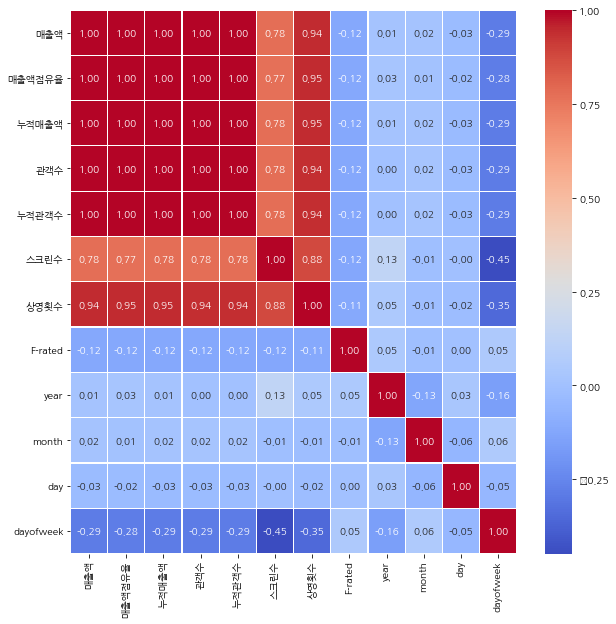

In [21]:
plt.figure(figsize=[10, 10])
sns.heatmap(df_in_digit.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='coolwarm')

## 연도별 F-rating과 매출의 상관관계
가설: 2015년에서 2019년으로 올 수록 상관관계가 양의 방향으로 증가할 것이다.  
결과: 2015년 -0.09, 2016년 -0.14, 2017년 -0.09, 2018년 -0.12, 2019년 -0.14로 꾸준히 음의 상관관계일 뿐 연도별로 큰 차이가 나거나 변화의 방향성은 보이지 않는다.  
추가로 할 것: 여성주도영화 개수를 비교

In [22]:
df_in_digit.dtypes

영화명                  object
영화코드                 object
개봉일          datetime64[ns]
매출액                   int64
매출액점유율              float64
누적매출액                 int64
관객수                   int64
누적관객수                 int64
스크린수                  int64
상영횟수                  int64
F-rated               int64
year                  int64
month                 int64
day                   int64
dayofweek             int64
dtype: object

In [23]:
released_2015 = df_in_digit[df_in_digit['개봉일'].dt.year == 2015]
released_2016 = df_in_digit[df_in_digit['개봉일'].dt.year == 2016]
released_2017 = df_in_digit[df_in_digit['개봉일'].dt.year == 2017]
released_2018 = df_in_digit[df_in_digit['개봉일'].dt.year == 2018]
released_2019 = df_in_digit[df_in_digit['개봉일'].dt.year == 2019]

In [24]:
released_2015.corr()

,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
매출액,1.000000,0.999940,1.000000,0.999888,0.999888,0.759919,0.955930,-0.090683,NaN,0.005287,-0.016122,-0.393223
매출액점유율,0.999940,1.000000,0.999940,0.999832,0.999832,0.758235,0.955617,-0.091667,NaN,0.005633,-0.015960,-0.394172
누적매출액,1.000000,0.999940,1.000000,0.999888,0.999888,0.759915,0.955928,-0.090678,NaN,0.005254,-0.016132,-0.393236
관객수,0.999888,0.999832,0.999888,1.000000,1.000000,0.760569,0.955331,-0.089994,NaN,0.006310,-0.014675,-0.395701
누적관객수,0.999888,0.999832,0.999888,1.000000,1.000000,0.760564,0.955329,-0.089987,NaN,0.006276,-0.014687,-0.395713
스크린수,0.759919,0.758235,0.759915,0.760569,0.760564,1.000000,0.871712,-0.105255,NaN,-0.035847,0.050195,-0.493875
상영횟수,0.955930,0.955617,0.955928,0.955331,0.955329,0.871712,1.000000,-0.103473,NaN,-0.031140,-0.007288,-0.422142
F-rated,-0.090683,-0.091667,-0.090678,-0.089994,-0.089987,-0.105255,-0.103473,1.000000,NaN,0.092559,-0.121920,0.061055
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.005287,0.005633,0.005254,0.006310,0.006276,-0.035847,-0.031140,0.092559,NaN,1.000000,-0.017257,0.102537


In [25]:
released_2016.corr()

,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
매출액,1.000000,0.999905,1.000000,0.999857,0.999857,0.840254,0.954313,-0.143900,NaN,0.064563,-0.097754,-0.267694
매출액점유율,0.999905,1.000000,0.999905,0.999753,0.999754,0.840776,0.955006,-0.143453,NaN,0.062970,-0.097431,-0.265785
누적매출액,1.000000,0.999905,1.000000,0.999857,0.999857,0.840256,0.954313,-0.143895,NaN,0.064552,-0.097761,-0.267689
관객수,0.999857,0.999753,0.999857,1.000000,1.000000,0.841718,0.955060,-0.143501,NaN,0.063313,-0.095114,-0.270223
누적관객수,0.999857,0.999754,0.999857,1.000000,1.000000,0.841719,0.955060,-0.143496,NaN,0.063302,-0.095121,-0.270218
스크린수,0.840254,0.840776,0.840256,0.841718,0.841719,1.000000,0.918593,-0.098846,NaN,0.065827,-0.092019,-0.398350
상영횟수,0.954313,0.955006,0.954313,0.955060,0.955060,0.918593,1.000000,-0.123444,NaN,0.054675,-0.096270,-0.311645
F-rated,-0.143900,-0.143453,-0.143895,-0.143501,-0.143496,-0.098846,-0.123444,1.000000,NaN,-0.066238,0.085073,0.074543
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.064563,0.062970,0.064552,0.063313,0.063302,0.065827,0.054675,-0.066238,NaN,1.000000,-0.055912,-0.081136


In [26]:
released_2017.corr()

,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
매출액,1.000000,0.999933,1.000000,0.999755,0.999755,0.829948,0.938091,-0.089767,NaN,0.011743,-0.053260,-0.367977
매출액점유율,0.999933,1.000000,0.999934,0.999696,0.999696,0.830152,0.938050,-0.091250,NaN,0.011567,-0.051538,-0.369841
누적매출액,1.000000,0.999934,1.000000,0.999754,0.999755,0.829981,0.938094,-0.089836,NaN,0.011573,-0.053388,-0.368093
관객수,0.999755,0.999696,0.999754,1.000000,1.000000,0.832909,0.938225,-0.088262,NaN,0.013852,-0.049906,-0.367366
누적관객수,0.999755,0.999696,0.999755,1.000000,1.000000,0.832940,0.938227,-0.088329,NaN,0.013686,-0.050032,-0.367479
스크린수,0.829948,0.830152,0.829981,0.832909,0.832940,1.000000,0.895382,-0.126528,NaN,-0.030481,0.002322,-0.478330
상영횟수,0.938091,0.938050,0.938094,0.938225,0.938227,0.895382,1.000000,-0.112663,NaN,-0.030617,-0.036131,-0.412577
F-rated,-0.089767,-0.091250,-0.089836,-0.088262,-0.088329,-0.126528,-0.112663,1.000000,NaN,0.048295,-0.115037,0.074971
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.011743,0.011567,0.011573,0.013852,0.013686,-0.030481,-0.030617,0.048295,NaN,1.000000,0.060813,0.177833


In [27]:
released_2018.corr()

,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
매출액,1.000000,0.999870,1.000000,0.999705,0.999705,0.808236,0.926561,-0.124716,NaN,0.080327,-0.104441,-0.339253
매출액점유율,0.999870,1.000000,0.999870,0.999535,0.999535,0.809248,0.927664,-0.125271,NaN,0.081323,-0.104744,-0.338762
누적매출액,1.000000,0.999870,1.000000,0.999705,0.999705,0.808230,0.926558,-0.124718,NaN,0.080295,-0.104436,-0.339260
관객수,0.999705,0.999535,0.999705,1.000000,1.000000,0.811920,0.927785,-0.124269,NaN,0.075646,-0.102258,-0.341112
누적관객수,0.999705,0.999535,0.999705,1.000000,1.000000,0.811911,0.927782,-0.124268,NaN,0.075612,-0.102251,-0.341118
스크린수,0.808236,0.809248,0.808230,0.811920,0.811911,1.000000,0.897033,-0.143148,NaN,0.064455,-0.078815,-0.456493
상영횟수,0.926561,0.927664,0.926558,0.927785,0.927782,0.897033,1.000000,-0.115864,NaN,0.035738,-0.076400,-0.400481
F-rated,-0.124716,-0.125271,-0.124718,-0.124269,-0.124268,-0.143148,-0.115864,1.000000,NaN,0.016537,0.031237,0.104967
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.080327,0.081323,0.080295,0.075646,0.075612,0.064455,0.035738,0.016537,NaN,1.000000,-0.101921,-0.042525


In [28]:
released_2019.corr()

,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
매출액,1.000000,0.999956,0.999999,0.999889,0.999884,0.722482,0.962573,-0.136964,NaN,-0.088756,0.122025,-0.177764
매출액점유율,0.999956,1.000000,0.999956,0.999851,0.999848,0.723333,0.962597,-0.138576,NaN,-0.089095,0.121422,-0.178526
누적매출액,0.999999,0.999956,1.000000,0.999889,0.999888,0.722635,0.962670,-0.136763,NaN,-0.089062,0.121852,-0.177881
관객수,0.999889,0.999851,0.999889,1.000000,0.999997,0.726817,0.964250,-0.137134,NaN,-0.089251,0.124342,-0.179855
누적관객수,0.999884,0.999848,0.999888,0.999997,1.000000,0.727023,0.964383,-0.136827,NaN,-0.089664,0.124103,-0.180009
스크린수,0.722482,0.723333,0.722635,0.726817,0.727023,1.000000,0.843491,-0.158539,NaN,-0.074750,0.118506,-0.410074
상영횟수,0.962573,0.962597,0.962670,0.964250,0.964383,0.843491,1.000000,-0.119830,NaN,-0.092866,0.100299,-0.262181
F-rated,-0.136964,-0.138576,-0.136763,-0.137134,-0.136827,-0.158539,-0.119830,1.000000,NaN,-0.027520,0.067914,0.008883
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.088756,-0.089095,-0.089062,-0.089251,-0.089664,-0.074750,-0.092866,-0.027520,NaN,1.000000,-0.210470,0.129252


## 배급사별 F-rated 영화 비율 (재민 작업중)
가설: 많은 스크린수와 상영횟수를 확보하는 대형 배급사가 여성주도영화를 많이 배급하지 않는다.  
결과:

In [29]:
f_rating_proportion = pd.DataFrame({'F-rated': [0, 1, 2, 3]})

for cp in df['배급사'].unique():
    dist = df[df['배급사'] == cp]
    by_dist = (dist.groupby('F-rated')['영화명'].count() / len(dist) * 100).reset_index().rename(columns = {'영화명':cp})
    f_rating_proportion = f_rating_proportion.merge(by_dist, how='left', on='F-rated')

f_rating_proportion = f_rating_proportion.T.drop('F-rated', axis=0) 

In [30]:
f_rating_proportion.head()

,0,1,2,3
메가박스중앙(주)플러스엠,39.130435,39.130435,17.391304,4.347826
"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",100.000000,NaN,NaN,NaN
(주)넥스트엔터테인먼트월드(NEW),62.745098,27.450980,7.843137,1.960784
씨제이이앤엠(주),57.407407,35.185185,3.703704,3.703704
고구마콘텐츠허브(주),100.000000,NaN,NaN,NaN


In [31]:
film_numbers = df['배급사'].value_counts().reset_index().set_index('index').rename(columns={'배급사':'영화개수'})
del film_numbers.index.name
film_numbers.head()

,영화개수
씨제이이앤엠(주),54
(주)넥스트엔터테인먼트월드(NEW),51
(주)리틀빅픽쳐스,37
(주)쇼박스,33
㈜인디스토리,31


In [32]:
f_rating_proportion = f_rating_proportion.merge(film_numbers, how='inner', left_index=True, right_index=True).sort_values('영화개수', ascending=False)
f_rating_proportion

,0,1,2,3,영화개수
씨제이이앤엠(주),57.407407,35.185185,3.703704,3.703704,54
(주)넥스트엔터테인먼트월드(NEW),62.745098,27.450980,7.843137,1.960784,51
(주)리틀빅픽쳐스,54.054054,24.324324,10.810811,10.810811,37
(주)쇼박스,60.606061,24.242424,15.151515,NaN,33
㈜인디스토리,67.741935,19.354839,6.451613,6.451613,31
CGV아트하우스,46.153846,38.461538,7.692308,7.692308,26
(주)드림팩트엔터테인먼트,52.173913,43.478261,4.347826,NaN,23
메가박스중앙(주)플러스엠,39.130435,39.130435,17.391304,4.347826,23
롯데쇼핑㈜롯데엔터테인먼트,56.521739,30.434783,13.043478,NaN,23
(주)인디플러그,40.000000,35.000000,10.000000,15.000000,20


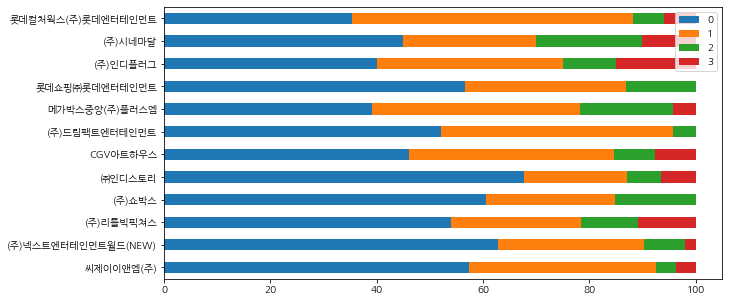

In [33]:
# 영화개수 상위 12개 배급사의 F-rated 영화 비율
plt.rcParams["figure.figsize"] = (10,5)
f_rating_proportion.iloc[:12, :4].plot(kind='barh', stacked=True, title='')

In [34]:
# 롯데쇼핑㈜롯데엔터테인먼트 = 롯데컬처웍스(주)롯데엔터테인먼트 등 배급사명 전처리 필요

In [ ]:
# 상영기간 추가로 보기